In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from sklearn.tree import DecisionTreeClassifier

## Data Transformation: One row - One vehicle

In [2]:
df = pd.read_csv('../data/processed/data_prepared.csv')

# data preprocessing
cat_features = df.columns[df.columns.str.contains('id')]
for cat_col in cat_features:
    df[cat_col] = df[cat_col].astype(str)
df

,vehicle_id,vehicle_id_old,circumstances_Alarm signal,circumstances_Backward motion,circumstances_Beginning of traffic,circumstances_Breaking,circumstances_Detour,circumstances_Direct traffic,circumstances_Fifth,circumstances_First,...,road_conditions_Other,road_conditions_Snow,road_conditions_Wet,fd_decision_FG,fd_decision_NG,hour,day_of_month,month,year,n_vehicles_left_in_accident
0,v_0,138906.0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,8,11,1,2018,1
1,v_0,138906.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,8,11,1,2018,1
2,v_1,168010.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,12,21,6,2018,2
3,v_1,168010.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,12,21,6,2018,2
4,v_1,168010.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,12,21,6,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19086,v_9006,566531.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,19,7,2021,2
19087,v_9007,566529.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,19,7,2021,2
19088,v_9007,566529.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,19,7,2021,2
19089,v_9007,566529.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,19,7,2021,2


In [3]:
print(df.shape)
print(df.reset_index().vehicle_id.nunique())

(19091, 80)
9008


#### Feature transformation 

In [4]:
# Circumstances features transformation: from multiple rows into one row representation
circumstances_cols = df.columns[df.columns.str.contains('circumstances')]
vehicle_circum_data=[]
for vehicle in tqdm(df.vehicle_id.unique()):
    data_dict = df[(df.vehicle_id == vehicle)][circumstances_cols].drop_duplicates().sum(axis=0).reset_index()
    vehicle_circum_data.append(data_dict.iloc[:, 1].values)

df_circum = pd.DataFrame(vehicle_circum_data, columns = circumstances_cols)
df_circum['vehicle_id'] = df.vehicle_id.unique()
df_circum

100%|█████████████████████████████████████████████████████████████████████████████| 9008/9008 [01:09<00:00, 130.22it/s]


,circumstances_Alarm signal,circumstances_Backward motion,circumstances_Beginning of traffic,circumstances_Breaking,circumstances_Detour,circumstances_Direct traffic,circumstances_Fifth,circumstances_First,circumstances_Fog lights,circumstances_Fourth,...,circumstances_Roadside,circumstances_Second,circumstances_Short,circumstances_Sixth,circumstances_Steady condition,circumstances_Third,circumstances_Turn to left,circumstances_Turn to right,circumstances_Yellow,vehicle_id
0,0,0,0,0,0,1,0,1,0,0,...,00,0,0,0,0,0,0,0,0,v_0
1,0,0,0,0,0,0,0,0,0,0,...,00000,0,1,0,0,1,0,0,0,v_1
2,0,0,0,0,0,1,0,1,0,0,...,00,0,0,0,0,0,0,0,0,v_2
3,0,0,0,0,0,1,0,1,0,0,...,00,0,0,0,0,0,0,0,0,v_3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_9003
9004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_9004
9005,0,0,0,0,0,1,0,0,0,0,...,00,1,0,0,0,0,0,0,0,v_9005
9006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_9006


In [5]:
# Road Signs features transformation: from multiple rows into one row representation
road_signs_cols = df.columns[df.columns.str.contains('road_sign')]
vehicle_road_sign_data=[]
for vehicle in tqdm(df.vehicle_id.unique()):
    data_dict = df[(df.vehicle_id == vehicle)][road_signs_cols].drop_duplicates().sum(axis=0).reset_index()
    vehicle_road_sign_data.append(data_dict.iloc[:, 1].values)

df_road_signs = pd.DataFrame(vehicle_road_sign_data, columns = road_signs_cols)
df_road_signs['vehicle_id'] = df.vehicle_id.unique()
df_road_signs

100%|█████████████████████████████████████████████████████████████████████████████| 9008/9008 [00:37<00:00, 239.43it/s]


,road_signs_1.12.1 Վտանգավոր շրջադարձեր,road_signs_1.22 Հետիոտնային անցում,road_signs_1.23 Երեխաներ,road_signs_1.8 Լուսացուցային կարգավորում,road_signs_2.1 Գլխավոր ճանապարհ,road_signs_2.4 Զիջեք ճանապարհը,road_signs_2.5 Երթևեկությունն առանց կանգառի արգելվում է,road_signs_3.24 Առավելագույն արագության սահմանափակում,road_signs_4.1.1 Երթևեկությունն ուղիղ,road_signs_4.1.4 Երթևեկությունն ուղիղ կամ դեպի աջ,...,road_signs_4.2.1 Արգելքի շրջանցումն աջից,road_signs_4.3 Շրջանաձև երթևեկություն,road_signs_5.15.1 Երթևեկության ուղղությունները գոտիներով,road_signs_5.16 Ավտոբուսի և (կամ) տրոլեյբուսի կանգառի տեղ,road_signs_5.19.1 Հետիոտնային անցում,road_signs_5.19.2 Հետիոտնային անցում,road_signs_6.3.1 Հետադարձի տեղ,road_signs_8.13 Գլխավոր ճանապարհի ուղղություն,road_signs_8.22.1 Խոչընդոտ,vehicle_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_9003
9004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_9004
9005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_9005
9006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,v_9006


In [6]:
# Road Surface features transformation: from multiple rows into one row representation
road_surface_cols = df.columns[df.columns.str.contains('road_surface')]
vehicle_road_surface_data=[]
for vehicle in tqdm(df.vehicle_id.unique()):
    data_dict = df[(df.vehicle_id == vehicle)][road_surface_cols].drop_duplicates().sum(axis=0).reset_index()
    vehicle_road_surface_data.append(data_dict.iloc[:, 1].values)

df_road_surface = pd.DataFrame(vehicle_road_surface_data, columns = road_surface_cols)
df_road_surface['vehicle_id'] = df.vehicle_id.unique()
df_road_surface

100%|█████████████████████████████████████████████████████████████████████████████| 9008/9008 [00:26<00:00, 343.99it/s]


,road_surface_Asphalt-concrete,road_surface_Cement-concrete,road_surface_Cobblestone,road_surface_Gravel base,road_surface_Other,vehicle_id
0,0,0,0,0,1,v_0
1,1,0,0,0,0,v_1
2,1,0,0,0,0,v_2
3,1,0,0,0,0,v_3
4,1,0,0,0,0,v_4
...,...,...,...,...,...,...
9003,1,0,0,0,0,v_9003
9004,1,0,0,0,0,v_9004
9005,1,0,0,0,0,v_9005
9006,1,0,0,0,0,v_9006


In [7]:
# Visibility features transformation: from multiple rows into one row representation
visibility_cols = df.columns[df.columns.str.contains('visibility')]
vehicle_visibility_data=[]
for vehicle in tqdm(df.vehicle_id.unique()):
    data_dict = df[(df.vehicle_id == vehicle)][visibility_cols].drop_duplicates().sum(axis=0).reset_index()
    vehicle_visibility_data.append(data_dict.iloc[:, 1].values)

df_visibility = pd.DataFrame(vehicle_visibility_data, columns = visibility_cols)
df_visibility['vehicle_id'] = df.vehicle_id.unique()
df_visibility

100%|█████████████████████████████████████████████████████████████████████████████| 9008/9008 [00:28<00:00, 319.53it/s]


,visibility_Clear day,visibility_Clear night,visibility_Foggy day,visibility_Foggy night,visibility_Rainy,visibility_Snow,visibility_Sunny,vehicle_id
0,1,0,0,0,0,0,0,v_0
1,1,0,0,0,0,0,0,v_1
2,1,0,0,0,0,0,0,v_2
3,0,1,0,0,0,0,0,v_3
4,0,1,0,0,0,0,0,v_4
...,...,...,...,...,...,...,...,...
9003,0,1,0,0,0,0,0,v_9003
9004,0,1,0,0,0,0,0,v_9004
9005,0,1,0,0,0,0,0,v_9005
9006,1,0,0,0,0,0,0,v_9006


In [8]:
# Road conditions features transformation: from multiple rows into one row representation
road_conditions_cols = df.columns[df.columns.str.contains('road_condition')]
vehicle_road_conditions_data=[]
for vehicle in tqdm(df.vehicle_id.unique()):
    data_dict = df[(df.vehicle_id == vehicle)][road_conditions_cols].drop_duplicates().sum(axis=0).reset_index()
    vehicle_road_conditions_data.append(data_dict.iloc[:, 1].values)

df_road_conditions = pd.DataFrame(vehicle_road_conditions_data, columns = road_conditions_cols)
df_road_conditions['vehicle_id'] = df.vehicle_id.unique()
df_road_conditions

100%|█████████████████████████████████████████████████████████████████████████████| 9008/9008 [00:27<00:00, 324.79it/s]


,road_conditions_Covered with flattened snow,road_conditions_Dry,road_conditions_Ice,road_conditions_Other,road_conditions_Snow,road_conditions_Wet,vehicle_id
0,0,1,0,0,0,0,v_0
1,0,1,0,0,0,0,v_1
2,0,1,0,0,0,0,v_2
3,0,1,0,0,0,0,v_3
4,0,1,0,0,0,0,v_4
...,...,...,...,...,...,...,...
9003,0,1,0,0,0,0,v_9003
9004,0,1,0,0,0,0,v_9004
9005,0,1,0,0,0,0,v_9005
9006,0,1,0,0,0,0,v_9006


In [9]:
df_no_dup = df[['vehicle_id'] + list(set(df.columns) - 
                                     set(
                                         list(df_circum.columns) + 
                                         list(df_road_signs.columns) + 
                                         list(df_road_surface.columns) + 
                                         list(df_visibility.columns) + 
                                         list(df_road_conditions.columns)
                                     ))].drop_duplicates()
df_no_dup.vehicle_id.value_counts()

v_7748    1
v_567     1
v_1256    1
v_6358    1
v_8399    1
         ..
v_6729    1
v_8223    1
v_5611    1
v_8544    1
v_5194    1
Name: vehicle_id, Length: 9008, dtype: int64

In [17]:
df_prep = df_no_dup.merge(df_circum, 
                          on = 'vehicle_id', how='left')\
                   .merge(df_road_signs, 
                          on = 'vehicle_id', how='left')\
                   .merge(df_road_surface, 
                          on = 'vehicle_id', how='left')\
                   .merge(df_visibility, 
                          on = 'vehicle_id', how='left')\
                   .merge(df_road_conditions, 
                          on = 'vehicle_id', how='left').set_index('vehicle_id').drop('vehicle_id_old', axis=1)

In [ ]:
l_unique_vehicles = list(df_prep.index.unique())
shuffle(l_unique_vehicles)

df_train = df_prep[df_prep.index.isin(l_unique_vehicles[:int(len(l_unique_vehicles)*0.7)])]
df_val = df_prep[df_prep.index.isin(l_unique_vehicles[int(len(l_unique_vehicles)*0.7):int(len(l_unique_vehicles)*0.8)])]
df_test = df_prep[df_prep.index.isin(l_unique_vehicles[int(len(l_unique_vehicles)*0.8):])]

## Modelling

In [11]:
df_train = pd.read_csv("../data/interim/train.csv").set_index('vehicle_id')
df_test = pd.read_csv("../data/interim/test.csv").set_index('vehicle_id')
df_val = pd.read_csv("../data/interim/val.csv").set_index('vehicle_id')

In [12]:
x_train, y_train = df_train.drop(['fd_decision_FG', 'fd_decision_NG'], axis=1), df_train['fd_decision_NG']
x_val, y_val = df_val.drop(['fd_decision_FG', 'fd_decision_NG'], axis=1), df_val['fd_decision_NG']
x_test, y_test = df_test.drop(['fd_decision_FG', 'fd_decision_NG'], axis=1), df_test['fd_decision_NG']

print(f"N vehicles in train: {df_train.index.nunique()}")
print(f"N vehicles in test: {df_test.index.nunique()}")
print(f"N vehicles in val: {df_val.index.nunique()}")

print(f"Checkings!!!!")
print(set(df_train.index).intersection(set(df_val.index)) == set())
print(set(df_train.index).intersection(set(df_test.index)) == set())
print(set(df_test.index).intersection(set(df_val.index)) == set())

N vehicles in train: 6305
N vehicles in test: 1802
N vehicles in val: 901
Checkings!!!!
True
True
True


In [13]:
# df_train.to_csv("../data/interim/train.csv")
# df_test.to_csv("../data/interim/test.csv")
# df_val.to_csv("../data/interim/val.csv")

In [14]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(x_test, y_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.451


In [15]:
from sklearn.tree import export_graphviz
tree.export_graphviz(model, out_file="tree.dot", class_names=["fg", "ng"],
                feature_names=x_train.columns, impurity=False, filled=True)

In [23]:
# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [22]:
# from sklearn import tree
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(tree,
#                    feature_names=x_train.columns,
#                    class_names=['fg', "ng"],
#                    filled=True)

## Tuning

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [27]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.949563838223632


array([[3134,   10],
       [ 308, 2853]], dtype=int64)

In [28]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.4506104328523862


array([[412, 439],
       [551, 400]], dtype=int64)

In [45]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=x_train.columns,
                       class_names=['ng', "fg"],
                       filled=True)
    
    
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))

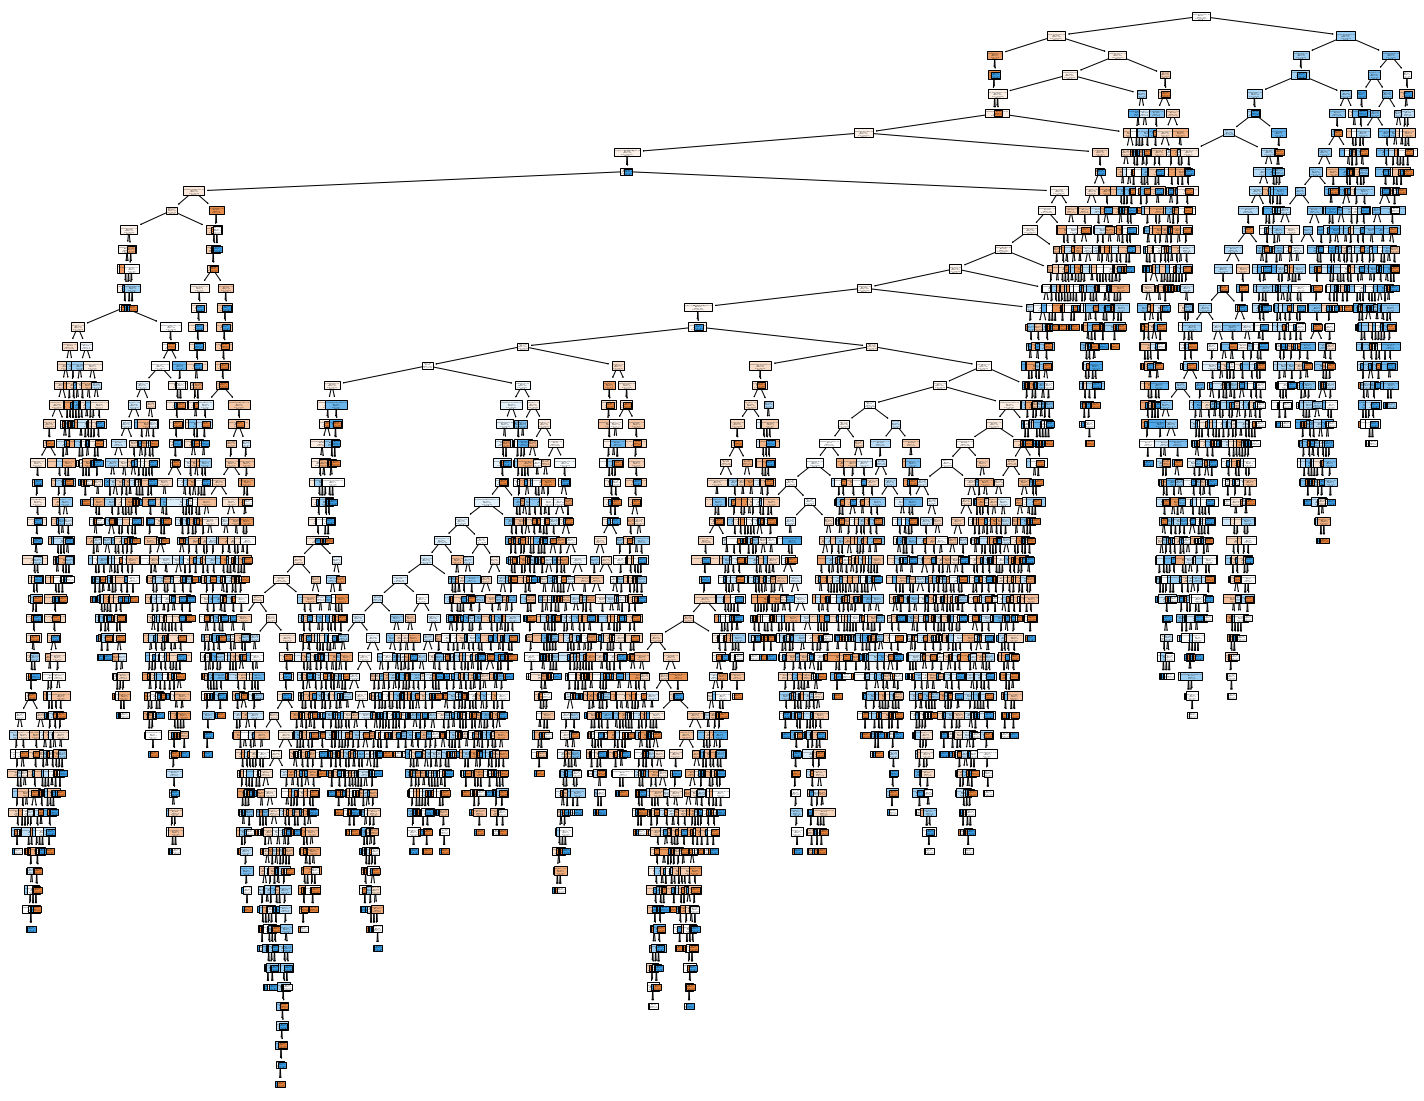

In [33]:
gph = get_dt_graph(model)

#### GridSearchCV

In [34]:
dt = DecisionTreeClassifier(random_state=42)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [37]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [39]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 2.88 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [40]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017229,0.002494,0.003884,0.000893,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.55168,0.55901,0.571066,0.562817,0.561143,0.006989,4
1,0.019760,0.001031,0.005493,0.000361,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.55168,0.55901,0.571066,0.562817,0.561143,0.006989,4
2,0.020392,0.001428,0.004365,0.000414,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.55168,0.55901,0.571066,0.562817,0.561143,0.006989,4
3,0.019140,0.000410,0.004378,0.000739,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.55168,0.55901,0.571066,0.562817,0.561143,0.006989,4
4,0.018631,0.001291,0.003996,0.000705,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.55168,0.55901,0.571066,0.562817,0.561143,0.006989,4


In [41]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,0.014874,0.001792,0.002751,0.000437,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.552949,0.559010,0.571066,0.562817,0.561461,0.006568,1
32,0.019347,0.001359,0.004126,0.000653,entropy,3,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.552949,0.559010,0.571066,0.562817,0.561461,0.006568,1
37,0.026898,0.001807,0.005494,0.002066,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.553583,0.557741,0.571066,0.562817,0.561302,0.006517,3
0,0.017229,0.002494,0.003884,0.000893,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.551680,0.559010,0.571066,0.562817,0.561143,0.006989,4
1,0.019760,0.001031,0.005493,0.000361,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.551680,0.559010,0.571066,0.562817,0.561143,0.006989,4


In [42]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

In [43]:
dt_best = grid_search.best_estimator_

In [46]:
evaluate_model(dt_best)

Train Accuracy : 0.5611419508326725
Train Confusion Matrix:
[[2761  383]
 [2384  777]]
--------------------------------------------------
Test Accuracy : 0.5432852386237513
Test Confusion Matrix:
[[751 100]
 [723 228]]


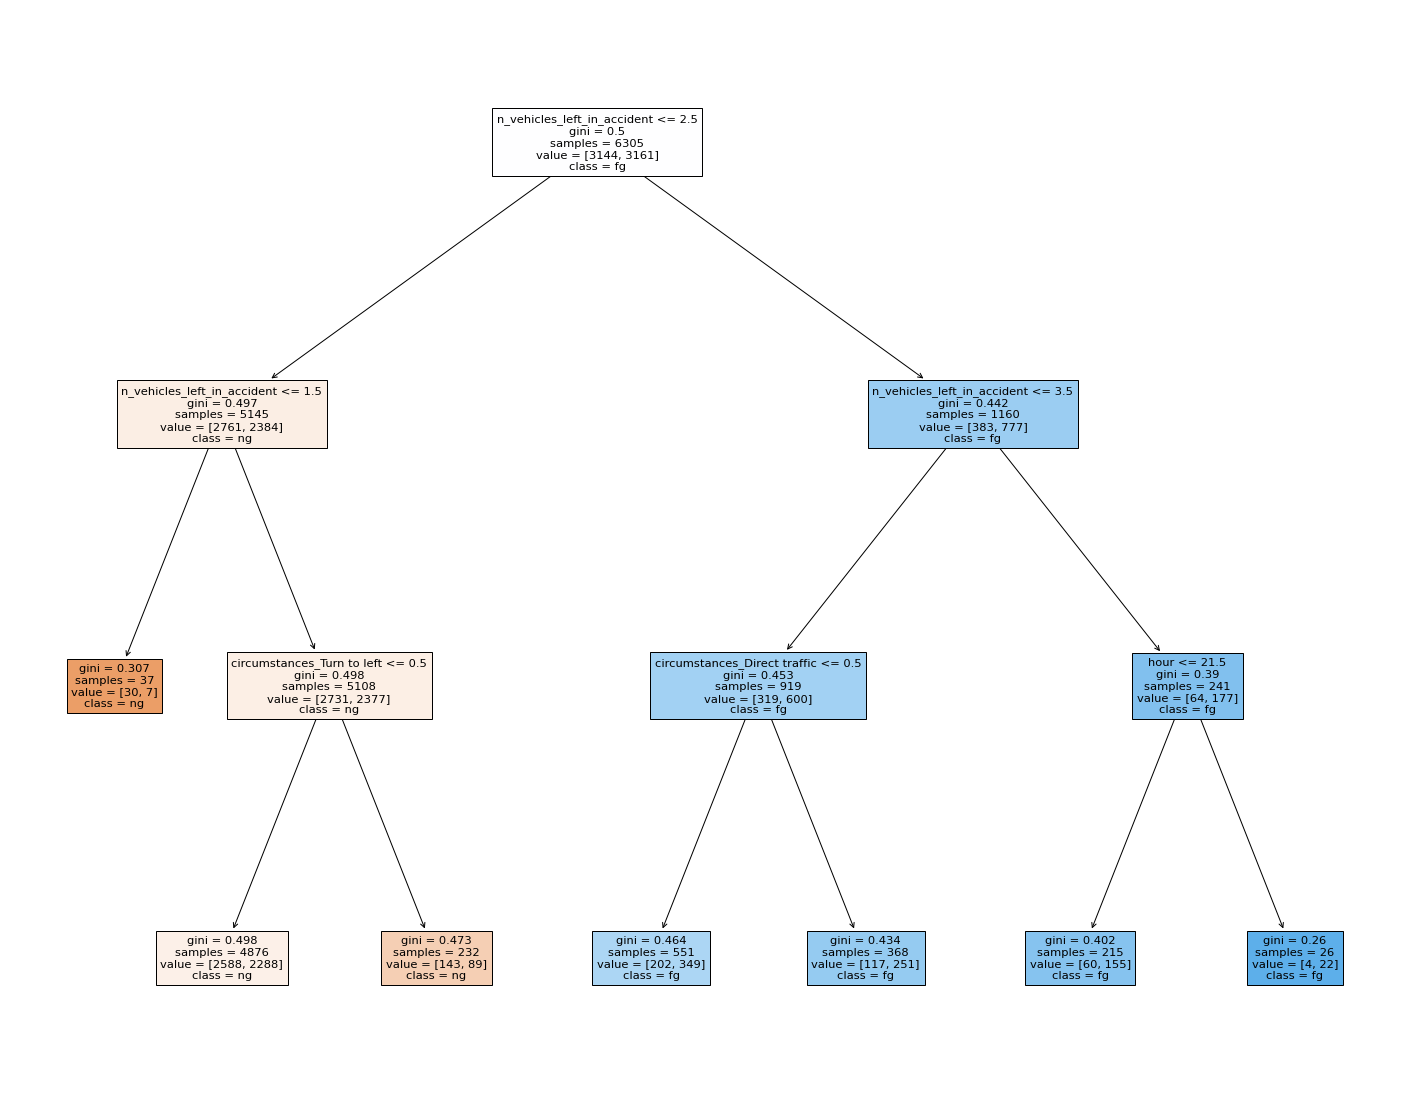

In [47]:
get_dt_graph(dt_best)

In [48]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, dt_best.predict(x_test)))

              precision    recall  f1-score   support

           0       0.51      0.88      0.65       851
           1       0.70      0.24      0.36       951

    accuracy                           0.54      1802
   macro avg       0.60      0.56      0.50      1802
weighted avg       0.61      0.54      0.49      1802



### Modelling without any feature transform

In [26]:
df_ = df.set_index('vehicle_id')

l_unique_vehicles = list(df_.index.unique())
shuffle(l_unique_vehicles)

df_train = df_[df_.index.isin(l_unique_vehicles[:int(len(l_unique_vehicles)*0.7)])]
df_val = df_[df_.index.isin(l_unique_vehicles[int(len(l_unique_vehicles)*0.7):int(len(l_unique_vehicles)*0.8)])]
df_test = df_[df_.index.isin(l_unique_vehicles[int(len(l_unique_vehicles)*0.8):])]

x_train, y_train = df_train.drop(['fd_decision_FG', 'fd_decision_NG'], axis=1), df_train['fd_decision_NG']
x_val, y_val = df_val.drop(['fd_decision_FG', 'fd_decision_NG'], axis=1), df_val['fd_decision_NG']
x_test, y_test = df_test.drop(['fd_decision_FG', 'fd_decision_NG'], axis=1), df_test['fd_decision_NG']

print(f"N Total vehicles: {df_.index.nunique()}")
print(f"N vehicles in train: {df_train.index.nunique()}")
print(f"N vehicles in test: {df_test.index.nunique()}")
print(f"N vehicles in val: {df_val.index.nunique()}")

print(f"Checkings!!!!")
print(df_.index.nunique() == df_train.index.nunique() + df_test.index.nunique() + df_val.index.nunique())
print(set(df_train.index).intersection(set(df_val.index)) == set())
print(set(df_train.index).intersection(set(df_test.index)) == set())
print(set(df_test.index).intersection(set(df_val.index)) == set())

N Total vehicles: 7497
N vehicles in train: 5247
N vehicles in test: 1500
N vehicles in val: 750
Checkings!!!!
True
True
True
True


In [27]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.892
Accuracy on test set: 0.311


### EYE CHECK

In [28]:
df_prep.iloc[0:2,:7]

,month,fd_decision_FG,n_vehicles_left_in_accident,day_of_month,hour,fd_decision_NG,year
vehicle_id,,,,,,,
26245.0,2,0,2,1,1,1,2020
26244.0,2,1,2,1,1,0,2020


In [29]:
df_prep[circumstances_cols].iloc[0:2,:10]

,circumstances_Alarm signal,circumstances_Backward motion,circumstances_Beginning of traffic,circumstances_Breaking,circumstances_Detour,circumstances_Direct traffic,circumstances_Fifth,circumstances_First,circumstances_Fog lights,circumstances_Fourth
vehicle_id,,,,,,,,,,
26245.0,0,0,0,0,0,0,0,0,0,0
26244.0,0,0,0,0,0,1,0,1,0,0


In [30]:
df_prep[circumstances_cols].iloc[0:2,10:20]

,circumstances_Green,circumstances_Left blinker,circumstances_Long,circumstances_Marker lights,circumstances_Not working,circumstances_Oncoming traffic,circumstances_Overtaking,circumstances_Parked,circumstances_Parking,circumstances_Rearrangement to left
vehicle_id,,,,,,,,,,
26245.0,0,0,0,0,0,0,0,0,0,0
26244.0,1,0,0,0,0,0,0,0,0,0


In [31]:
df_prep[circumstances_cols].iloc[0:2,20:]

,circumstances_Rearrangement to right,circumstances_Red,circumstances_Reverse,circumstances_Right blinker,circumstances_Roadside,circumstances_Second,circumstances_Sixth,circumstances_Steady condition,circumstances_Third,circumstances_Turn to right,circumstances_Yellow
vehicle_id,,,,,,,,,,,
26245.0,0,0,0,0,0,0,0,0,0,0,0
26244.0,0,0,0,0,000,0,0,0,0,0,0


In [32]:
df_prep[visibility_cols].iloc[0:2,:]

,visibility_Clear day,visibility_Clear night,visibility_Foggy day,visibility_Foggy night,visibility_Rainy,visibility_Snow,visibility_Sunny
vehicle_id,,,,,,,
26245.0,0,1,0,0,0,0,0
26244.0,0,1,0,0,0,0,0


In [35]:
df_prep[road_signs_cols].iloc[0:2,:]

,road_signs_1.2 Երկաթուղային գծանց` առանց ուղեփակոցի,road_signs_1.22 Հետիոտնային անցում,road_signs_1.3.2 Բազմագիծ երկաթուղի,road_signs_1.4.3 Մոտեցում երկաթուղային գծանցին,road_signs_1.8 Լուսացուցային կարգավորում,road_signs_2.1 Գլխավոր ճանապարհ,road_signs_2.4 Զիջեք ճանապարհը,road_signs_4.1.1 Երթևեկությունն ուղիղ,road_signs_5.15.1 Երթևեկության ուղղությունները գոտիներով,road_signs_5.19.2 Հետիոտնային անցում,road_signs_8.13 Գլխավոր ճանապարհի ուղղություն,road_signs_8.22.1 Խոչընդոտ
vehicle_id,,,,,,,,,,,,
26245.0,0,0,0,0,0,0,0,0,0,0,0,0
26244.0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df_prep[road_surface_cols].iloc[0:2,:]

,road_surface_Asphalt-concrete,road_surface_Cement-concrete,road_surface_Cobblestone,road_surface_Gravel base,road_surface_Other
vehicle_id,,,,,
26245.0,1,0,0,0,0
26244.0,1,0,0,0,0


In [38]:
df_prep[road_conditions_cols].iloc[0:2,:]

,road_conditions_Covered with flattened snow,road_conditions_Dry,road_conditions_Ice,road_conditions_Other,road_conditions_Snow,road_conditions_Wet
vehicle_id,,,,,,
26245.0,0,1,0,0,0,0
26244.0,0,1,0,0,0,0
